In [1]:
import os
import pandas as pd
import numpy as np

import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "{}/data/PUIdata".format(os.getenv("HOME"))
    puidata = os.getenv("PUIDATA")
    print("Warning: PUIDATA environmental variable not found and set by code, please review!")
print("PUIDATA: {}".format(puidata))

PUIDATA: /nfshome/pmb434/PUIdata


In [8]:
year = '2017'
month = '01'
filename = 'yellow_tripdata_' + year + '-' + month + '.csv'
month1 = pd.read_csv(puidata + '/' + filename, parse_dates=[1], infer_datetime_format=True)
month1.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80


In [12]:
taxi_zones = [140,141,262,263]

month1_select = month1[month1.PULocationID.isin(taxi_zones)]

In [13]:
month1_select.PULocationID.value_counts()

141    226739
263    175604
140    170197
262    119578
Name: PULocationID, dtype: int64

In [14]:
month1_select['date'] = month1_select.tpep_pickup_datetime.dt.date
month1_select.head()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,date
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30,2017-01-09
9,2,2017-01-01 00:00:05,2017-01-01 00:05:04,5,1.76,1,N,140,74,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30,2017-01-01
14,2,2017-01-01 00:00:06,2017-01-01 00:09:30,4,2.43,1,N,141,107,1,9.5,0.5,0.5,2.70,0.0,0.3,13.50,2017-01-01
25,2,2017-01-01 00:00:13,2017-01-01 00:15:39,1,4.68,1,N,140,223,1,16.5,0.5,0.5,4.45,0.0,0.3,22.25,2017-01-01
64,1,2017-01-01 00:00:36,2017-01-01 00:12:55,1,3.60,1,N,263,7,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30,2017-01-01


In [17]:
month1_grouped =  month1_select.groupby(['PULocationID','date'], as_index=False)[['passenger_count']].sum()
month1_grouped.head()

,PULocationID,date,passenger_count
0,140,2017-01-01,5763
1,140,2017-01-02,5050
2,140,2017-01-03,9209
3,140,2017-01-04,9487
4,140,2017-01-05,10554


In [ ]:
month1_grouped.append()

In [20]:
year = '2017'
taxi_zones = [140,141,262,263,75,236,237]

all_months = pd.DataFrame(columns=['PULocationID', 'date', 'passenger_count'])

for m in range(1,13):
    month = str(m) if len(str(m)) == 2 else '0' + str(m)
    filename = 'yellow_tripdata_' + year + '-' + month + '.csv'
    
    print('Reading ' + filename)
    
    month_df = pd.read_csv(puidata + '/' + filename, parse_dates=[1], infer_datetime_format=True)
    
    month_select = month_df[month_df.PULocationID.isin(taxi_zones)]
    
    month_select['date'] = month_select.tpep_pickup_datetime.dt.date
    
    month_grouped =  month_select.groupby(['PULocationID','date'], as_index=False)[['passenger_count']].sum()
    
    print('Done with ' + filename)
    
    all_months = all_months.append(month_grouped)

all_months.head()

Reading yellow_tripdata_2017-01.csv


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Done with yellow_tripdata_2017-01.csv
Reading yellow_tripdata_2017-02.csv
Done with yellow_tripdata_2017-02.csv
Reading yellow_tripdata_2017-03.csv
Done with yellow_tripdata_2017-03.csv
Reading yellow_tripdata_2017-04.csv
Done with yellow_tripdata_2017-04.csv
Reading yellow_tripdata_2017-05.csv
Done with yellow_tripdata_2017-05.csv
Reading yellow_tripdata_2017-06.csv
Done with yellow_tripdata_2017-06.csv
Reading yellow_tripdata_2017-07.csv
Done with yellow_tripdata_2017-07.csv
Reading yellow_tripdata_2017-08.csv
Done with yellow_tripdata_2017-08.csv
Reading yellow_tripdata_2017-09.csv
Done with yellow_tripdata_2017-09.csv
Reading yellow_tripdata_2017-10.csv
Done with yellow_tripdata_2017-10.csv
Reading yellow_tripdata_2017-11.csv
Done with yellow_tripdata_2017-11.csv
Reading yellow_tripdata_2017-12.csv
Done with yellow_tripdata_2017-12.csv


,PULocationID,date,passenger_count
0,75.0,2017-01-01,3982.0
1,75.0,2017-01-02,2441.0
2,75.0,2017-01-03,3171.0
3,75.0,2017-01-04,3104.0
4,75.0,2017-01-05,3414.0


In [21]:
all_months.PULocationID.value_counts()

237.0    379
263.0    374
141.0    374
236.0    373
140.0    373
75.0     372
262.0    368
Name: PULocationID, dtype: int64

In [26]:
all_months['date'] = pd.to_datetime(all_months.date)

In [32]:
all_months_clean = all_months[all_months.date.dt.year == 2017]

In [33]:
all_months_clean.PULocationID.value_counts()

237.0    373
75.0     372
263.0    371
236.0    371
141.0    371
140.0    371
262.0    367
Name: PULocationID, dtype: int64

In [39]:
all_months_clean = all_months_clean.groupby(['PULocationID','date'], as_index=False)[['passenger_count']].sum()

In [40]:
all_months_clean.PULocationID.value_counts()

263.0    365
262.0    365
237.0    365
236.0    365
141.0    365
140.0    365
75.0     365
Name: PULocationID, dtype: int64

In [42]:
all_months_clean.to_csv('2017_yellow_taxi.csv', index=False)

In [4]:
year = '2016'
taxi_zones = [140,141,262,263,75,236,237]
columns = ['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount','error','error2']

all_months_2016 = pd.DataFrame(columns=['PULocationID', 'date', 'passenger_count'])

for m in range(7,13):
    month = str(m) if len(str(m)) == 2 else '0' + str(m)
    filename = 'yellow_tripdata_' + year + '-' + month + '.csv'
    
    print('Reading ' + filename)
    
    month_df = pd.read_csv(puidata + '/' + filename, parse_dates=[1], infer_datetime_format=True,
                           index_col=False, names=columns, skiprows=[0])
    
    month_select = month_df[month_df.PULocationID.isin(taxi_zones)]
    
    month_select['date'] = month_select.tpep_pickup_datetime.dt.date
    
    month_grouped =  month_select.groupby(['PULocationID','date'], as_index=False)[['passenger_count']].sum()
    
    print('Done with ' + filename)
    
    all_months_2016 = all_months_2016.append(month_grouped)

all_months_2016.head()

Reading yellow_tripdata_2016-07.csv


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Done with yellow_tripdata_2016-07.csv
Reading yellow_tripdata_2016-08.csv
Done with yellow_tripdata_2016-08.csv
Reading yellow_tripdata_2016-09.csv
Done with yellow_tripdata_2016-09.csv
Reading yellow_tripdata_2016-10.csv
Done with yellow_tripdata_2016-10.csv
Reading yellow_tripdata_2016-11.csv
Done with yellow_tripdata_2016-11.csv
Reading yellow_tripdata_2016-12.csv
Done with yellow_tripdata_2016-12.csv


,PULocationID,date,passenger_count
0,75.0,2016-07-01,3953.0
1,75.0,2016-07-02,3535.0
2,75.0,2016-07-03,2933.0
3,75.0,2016-07-04,2639.0
4,75.0,2016-07-05,2766.0


In [5]:
all_months_2016.PULocationID.value_counts()

263.0    184
262.0    184
237.0    184
236.0    184
141.0    184
140.0    184
75.0     184
Name: PULocationID, dtype: int64

In [6]:
all_months_2016['date'] = pd.to_datetime(all_months_2016.date)

In [7]:
all_months_clean_2016 = all_months_2016[all_months_2016.date.dt.year == 2016]

In [9]:
all_months_clean_2016.PULocationID.value_counts()

263.0    184
262.0    184
237.0    184
236.0    184
141.0    184
140.0    184
75.0     184
Name: PULocationID, dtype: int64

In [10]:
all_months_clean_2016 = all_months_clean_2016.groupby(['PULocationID','date'], as_index=False)[['passenger_count']].sum()

In [11]:
all_months_clean_2016.PULocationID.value_counts()

263.0    184
262.0    184
237.0    184
236.0    184
141.0    184
140.0    184
75.0     184
Name: PULocationID, dtype: int64

In [12]:
all_months_clean_2017 = pd.read_csv('2017_yellow_taxi.csv')
all_months_clean_2017.PULocationID.value_counts()

263.0    365
262.0    365
237.0    365
236.0    365
141.0    365
140.0    365
75.0     365
Name: PULocationID, dtype: int64

In [13]:
final_df = all_months_clean_2016.append(all_months_clean_2017)

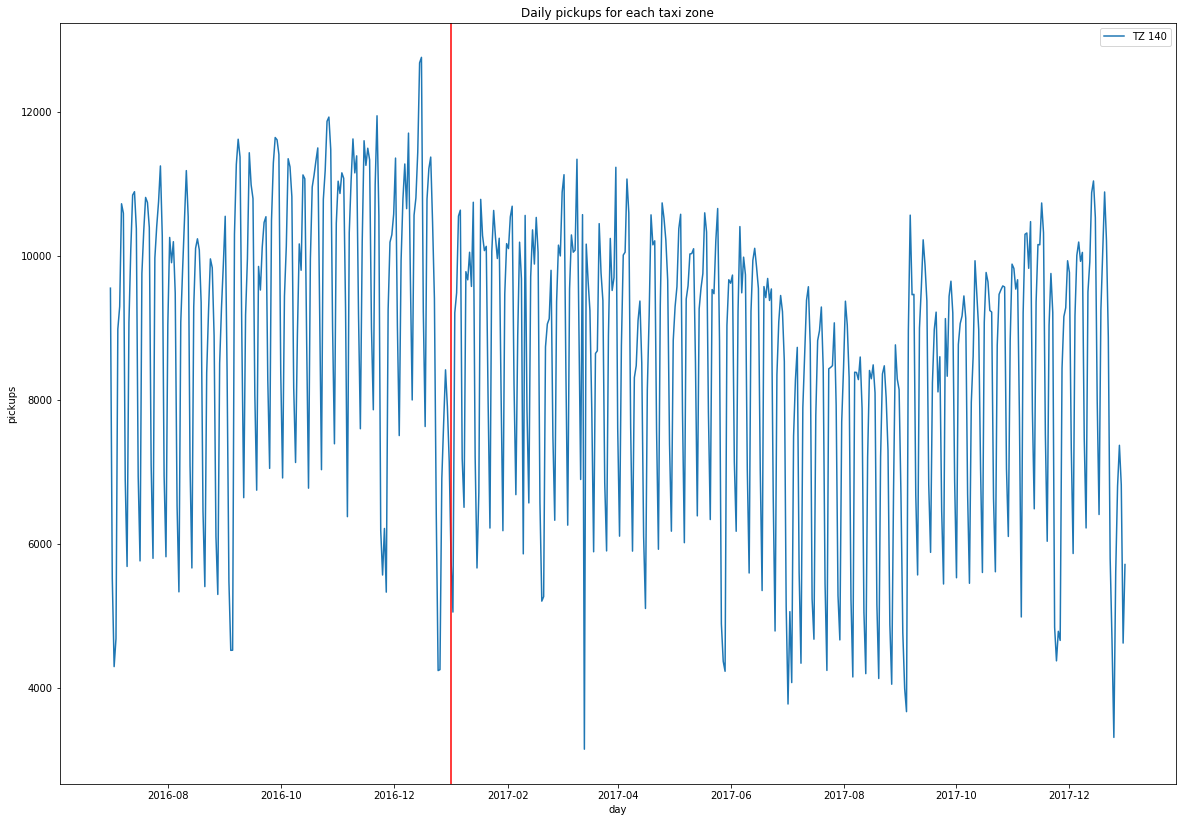

In [22]:
#Plot
fig, (ax1) = pl.subplots(1,1, figsize=(20,14))
#fig.subplots_adjust(hspace=0.3)

#Natural space
for i in [140]:
    ax1.plot(final_df[final_df.PULocationID == i].date,
             final_df[final_df.PULocationID == i].passenger_count, '-', label = 'TZ {}'.format(i))

    
ax1.axvline(x=pd.datetime(2017,1,1), color='r')

ax1.set_title('Daily pickups for each taxi zone')
ax1.set_xlabel('day')
ax1.set_ylabel('pickups')
ax1.legend()

pl.show()

In [23]:
year = '2018'
taxi_zones = [140,141,262,263,75,236,237]

all_months_2018 = pd.DataFrame(columns=['PULocationID', 'date', 'passenger_count'])

for m in range(1,7):
    month = str(m) if len(str(m)) == 2 else '0' + str(m)
    filename = 'yellow_tripdata_' + year + '-' + month + '.csv'
    
    print('Reading ' + filename)
    
    month_df = pd.read_csv(puidata + '/' + filename, parse_dates=[1], infer_datetime_format=True)
    
    month_select = month_df[month_df.PULocationID.isin(taxi_zones)]
    
    month_select['date'] = month_select.tpep_pickup_datetime.dt.date
    
    month_grouped =  month_select.groupby(['PULocationID','date'], as_index=False)[['passenger_count']].sum()
    
    print('Done with ' + filename)
    
    all_months_2018 = all_months_2018.append(month_grouped)

all_months_2018.head()

Reading yellow_tripdata_2018-01.csv


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Done with yellow_tripdata_2018-01.csv
Reading yellow_tripdata_2018-02.csv
Done with yellow_tripdata_2018-02.csv
Reading yellow_tripdata_2018-03.csv
Done with yellow_tripdata_2018-03.csv
Reading yellow_tripdata_2018-04.csv
Done with yellow_tripdata_2018-04.csv
Reading yellow_tripdata_2018-05.csv
Done with yellow_tripdata_2018-05.csv
Reading yellow_tripdata_2018-06.csv
Done with yellow_tripdata_2018-06.csv


,PULocationID,date,passenger_count
0,75.0,2009-01-01,1.0
1,75.0,2017-12-31,11.0
2,75.0,2018-01-01,2823.0
3,75.0,2018-01-02,2723.0
4,75.0,2018-01-03,2995.0


In [24]:
all_months_2018['date'] = pd.to_datetime(all_months_2018.date)

In [25]:
all_months_2018 = all_months_2018[all_months_2018.date.dt.year == 2018]

In [26]:
all_months_2018.PULocationID.value_counts()

236.0    225
237.0    219
141.0    213
263.0    210
140.0    204
262.0    202
75.0     197
Name: PULocationID, dtype: int64

In [27]:
all_months_2018_clean = all_months_2018.groupby(['PULocationID','date'], as_index=False)[['passenger_count']].sum()

In [28]:
all_months_2018_clean.PULocationID.value_counts()

236.0    191
263.0    187
237.0    187
262.0    186
141.0    186
140.0    186
75.0     183
Name: PULocationID, dtype: int64

In [29]:
all_months_2018_clean['month'] = all_months_2018_clean.date.dt.month

In [31]:
all_months_2018_clean = all_months_2018_clean[all_months_2018_clean.month < 7]

In [32]:
all_months_2018_clean.PULocationID.value_counts()

263.0    181
262.0    181
237.0    181
236.0    181
141.0    181
140.0    181
75.0     181
Name: PULocationID, dtype: int64

In [33]:
final_df = final_df.append(all_months_2018_clean)

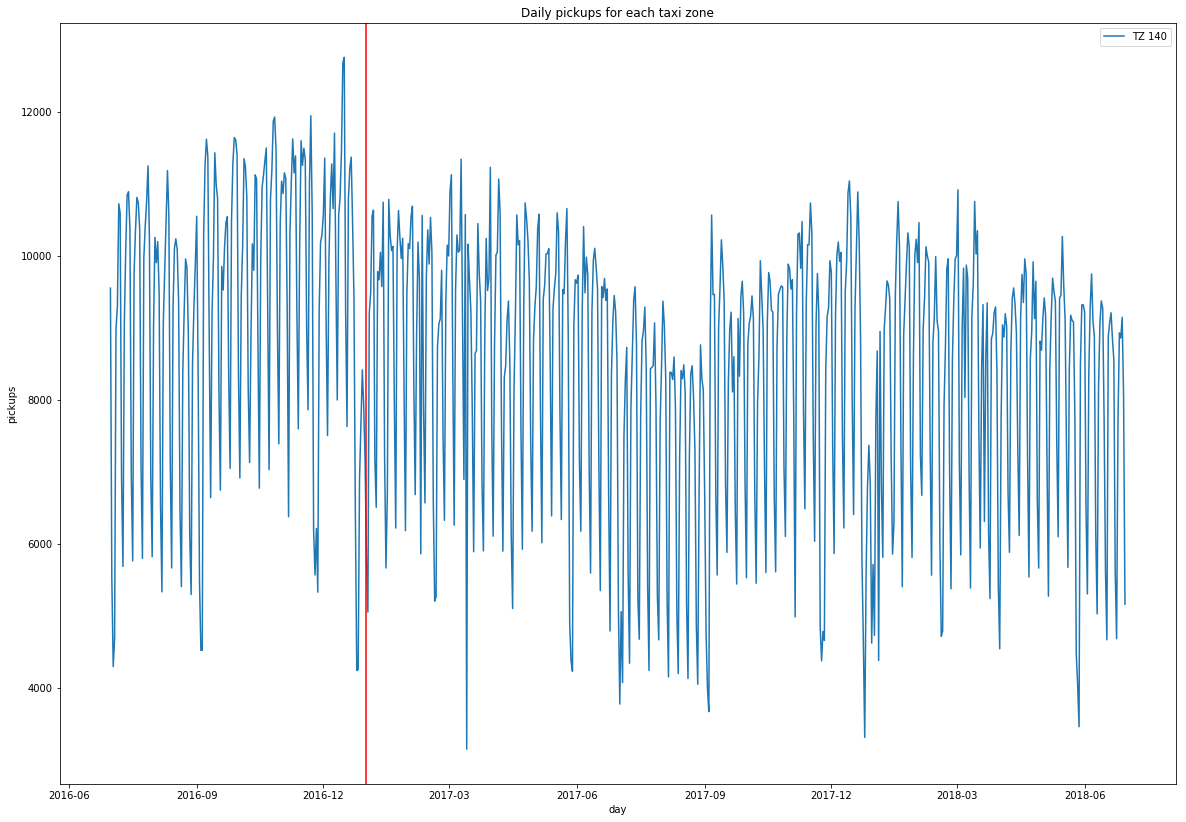

In [34]:
#Plot
fig, (ax1) = pl.subplots(1,1, figsize=(20,14))
#fig.subplots_adjust(hspace=0.3)

#Natural space
for i in [140]:
    ax1.plot(final_df[final_df.PULocationID == i].date,
             final_df[final_df.PULocationID == i].passenger_count, '-', label = 'TZ {}'.format(i))

    
ax1.axvline(x=pd.datetime(2017,1,1), color='r')

ax1.set_title('Daily pickups for each taxi zone')
ax1.set_xlabel('day')
ax1.set_ylabel('pickups')
ax1.legend()

pl.show()

In [35]:
final_df.to_csv('all_yellow_taxi.csv', index=False)

In [3]:
final_df = pd.read_csv('all_yellow_taxi.csv')

In [12]:
impacted = [140,141,263,262]
final_df['impacted'] = final_df.PULocationID.isin(impacted).astype(int)

In [14]:
final_df_grouped = final_df.groupby(['impacted','date'], as_index=False)[['passenger_count']].sum()
final_df_grouped.head()

,impacted,date,passenger_count
0,0,2016-07-01 00:00:00,36469.0
1,0,2016-07-02 00:00:00,25852.0
2,0,2016-07-03 00:00:00,20196.0
3,0,2016-07-04 00:00:00,18291.0
4,0,2016-07-05 00:00:00,35446.0


In [18]:
final_df_grouped['date'] = pd.to_datetime(final_df_grouped.date).dt.date
final_df_grouped.head()

,impacted,date,passenger_count
0,0,2016-07-01,36469.0
1,0,2016-07-02,25852.0
2,0,2016-07-03,20196.0
3,0,2016-07-04,18291.0
4,0,2016-07-05,35446.0


In [19]:
##single point change detector
# as in https://www.slideshare.net/FrankKelly3/changepoint-detection-with-bayesian-inference
# with modifications for efficiency

def changeFinder(data):

    n = len(data)
    datamean = data.mean()
    datasqmean = (data**2).mean()
    fac = datasqmean - datamean**2
    
    datacsum = data.cumsum()
    datasum = datacsum[-1]

    ppoc = np.zeros(n) #container for point of change relative prob

    #online (iterative) search for point of change
    for m in range(n-1):
        pos = m + 1
        relativePosition = (pos) * (n - pos)
 
        Q = datacsum[m] - (datasum - datacsum[m]) #cumsum up to m - cumsum after
        
        U = -(datamean * (n - 2 * pos) + Q)**2 / (4.0 * relativePosition) + fac
       
        ppoc[m+1] = (-(n * 0.5 - 1) * np.log(n * U * 0.5) - 
                 0.5 * np.log(relativePosition))

    ppoc[0] = min(ppoc[1:])
    changePoint = np.argmax(ppoc)
    
    return {'pChange': ppoc, 
            'pointOfChange': changePoint + 1,
            'meanBefore': (data[:changePoint+1]).mean(), 
            'meanAfter': (data[(changePoint+1):]).mean()}

In [20]:
timeseries = final_df_grouped[final_df_grouped.impacted == 1].passenger_count.values
dates = final_df_grouped[final_df_grouped.impacted == 1].date
pochange = changeFinder(timeseries)
pochange['pointOfChange']

331

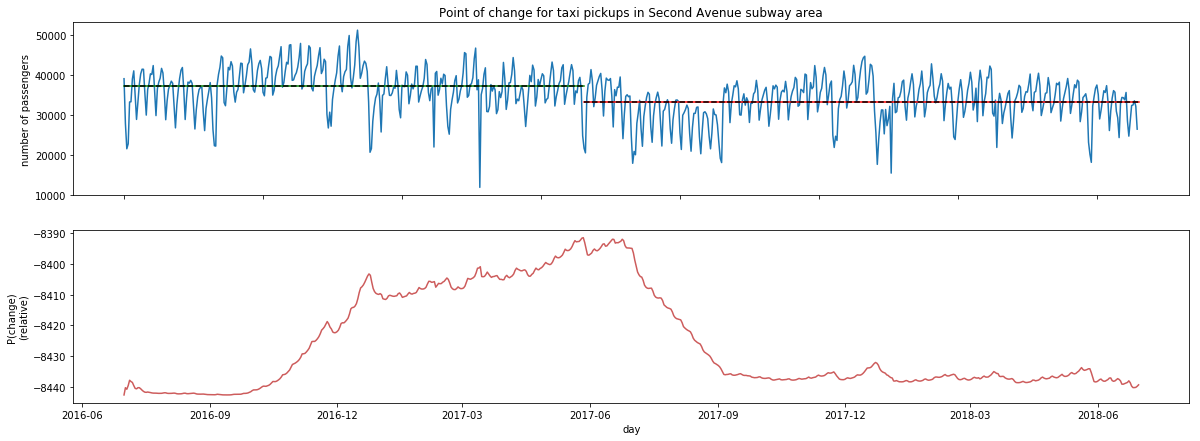

In [26]:
fig = pl.figure(figsize=(20,7))
ax1 = pl.subplot(211)
ax1.plot(range(len(timeseries)), timeseries)
#ax1.plot([0,100], [0,0], '-')
#ax1.plot([100,200], [3,3], '-')

ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'g-')
ax1.plot([pochange['pointOfChange'],len(timeseries)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'r-')
ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'k--')
ax1.plot([pochange['pointOfChange'],len(timeseries)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'k--')
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel("number of passengers")

ax1.set_title("Point of change for taxi pickups in Second Avenue subway area")

ax2 = pl.subplot(212)
ax2.plot(dates, 
        pochange['pChange'], color="IndianRed")
ax2.set_ylabel("P(change)\n(relative)")
#ax2.set_xticklabels(dates, visible=True)
ax2.set_xlabel("day");
pl.savefig('point_of_change.png')

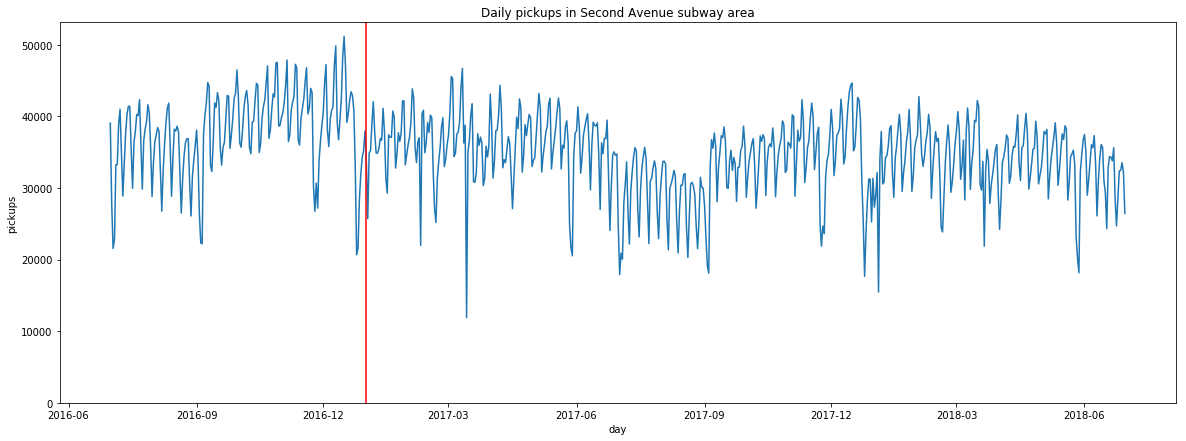

In [32]:
#Plot
fig, (ax1) = pl.subplots(1,1, figsize=(20,7))
#fig.subplots_adjust(hspace=0.3)

#Natural space
for i in [140]:
    ax1.plot(dates,
             timeseries, '-', label = 'TZ {}'.format(i))

    
ax1.axvline(x=pd.datetime(2017,1,1), color='r')

ax1.set_title('Daily pickups in Second Avenue subway area')
ax1.set_xlabel('day')
ax1.set_ylabel('pickups')
#ax1.legend()

ax1.set_ylim(0)

pl.savefig('daily_pickups.png')
pl.show()

In [49]:
timeseries = final_df_grouped[(final_df_grouped.impacted == 1) & (final_df_grouped.date < pd.datetime(2017, 7, 1).date())].passenger_count.values
dates = final_df_grouped[(final_df_grouped.impacted == 1) & (final_df_grouped.date < pd.datetime(2017, 7, 1).date())].date
pochange = changeFinder(timeseries)
pochange['pointOfChange']

177

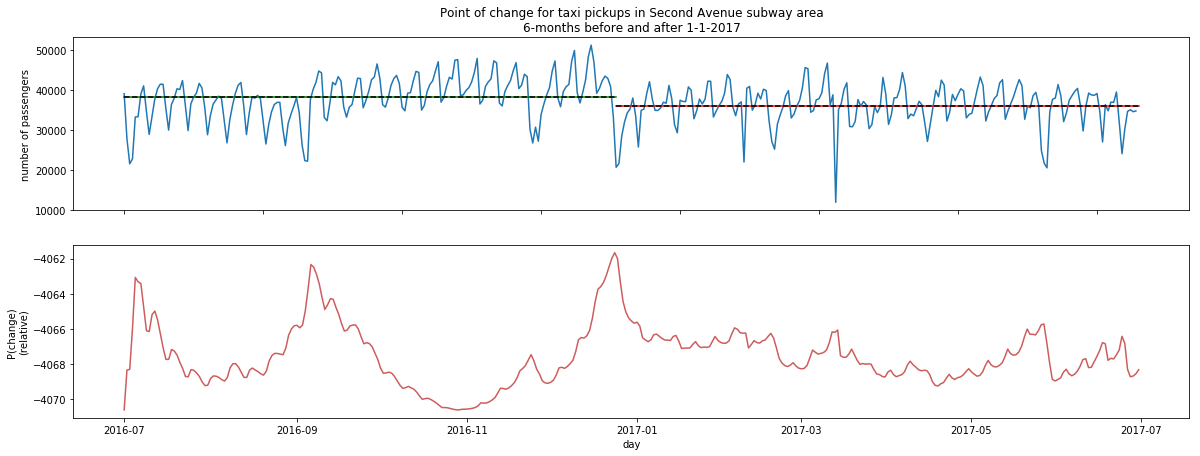

In [50]:
fig = pl.figure(figsize=(20,7))
ax1 = pl.subplot(211)
ax1.plot(range(len(timeseries)), timeseries)
#ax1.plot([0,100], [0,0], '-')
#ax1.plot([100,200], [3,3], '-')

ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'g-')
ax1.plot([pochange['pointOfChange'],len(timeseries)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'r-')
ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'k--')
ax1.plot([pochange['pointOfChange'],len(timeseries)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'k--')
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel("number of passengers")

ax1.set_title("Point of change for taxi pickups in Second Avenue subway area\n6-months before and after 1-1-2017")

ax2 = pl.subplot(212)
ax2.plot(dates, 
        pochange['pChange'], color="IndianRed")
ax2.set_ylabel("P(change)\n(relative)")
#ax2.set_xticklabels(dates, visible=True)
ax2.set_xlabel("day");
pl.savefig('point_of_change1.png')

In [51]:
timeseries = final_df_grouped[(final_df_grouped.impacted == 1) & (final_df_grouped.date >= pd.datetime(2017, 7, 1).date())].passenger_count.values
dates = final_df_grouped[(final_df_grouped.impacted == 1) & (final_df_grouped.date >= pd.datetime(2017, 7, 1).date())].date
pochange = changeFinder(timeseries)
pochange['pointOfChange']

67

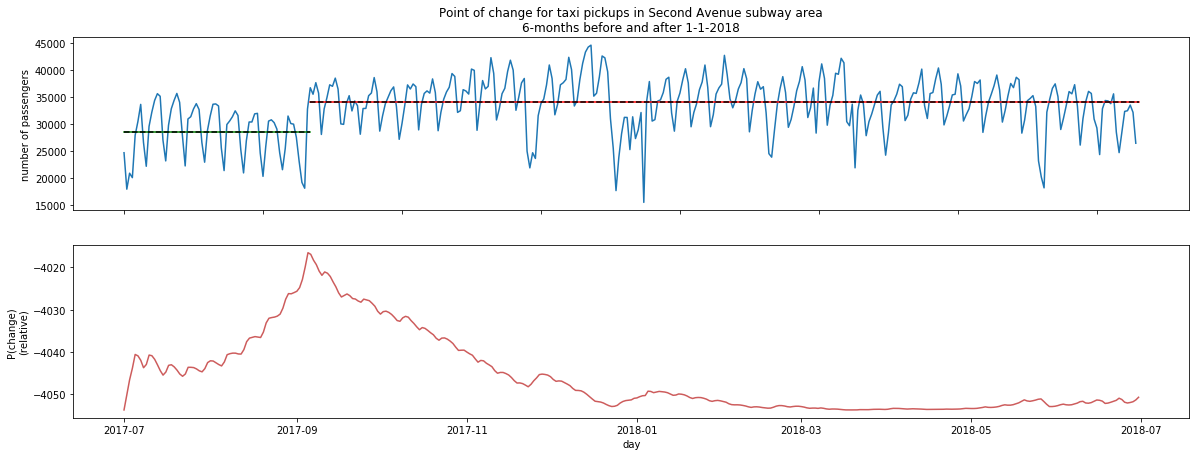

In [53]:
fig = pl.figure(figsize=(20,7))
ax1 = pl.subplot(211)
ax1.plot(range(len(timeseries)), timeseries)
#ax1.plot([0,100], [0,0], '-')
#ax1.plot([100,200], [3,3], '-')

ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'g-')
ax1.plot([pochange['pointOfChange'],len(timeseries)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'r-')
ax1.plot([0,pochange['pointOfChange']], 
         [pochange['meanBefore'], pochange['meanBefore']], 'k--')
ax1.plot([pochange['pointOfChange'],len(timeseries)], 
         [pochange['meanAfter'], pochange['meanAfter']], 'k--')
ax1.set_xticklabels(ax1.get_xticklabels(), visible=False)
ax1.set_ylabel("number of passengers")

ax1.set_title("Point of change for taxi pickups in Second Avenue subway area\n6-months before and after 1-1-2018")

ax2 = pl.subplot(212)
ax2.plot(dates, 
        pochange['pChange'], color="IndianRed")
ax2.set_ylabel("P(change)\n(relative)")
#ax2.set_xticklabels(dates, visible=True)
ax2.set_xlabel("day");
pl.savefig('point_of_change2.png')

In [35]:
final_df_grouped['week'] = final_df_grouped.date.apply(lambda x: next_weekday(x,0))

In [37]:
final_df_week = final_df_grouped.groupby(['impacted','week'], as_index=False)[['passenger_count']].sum()